In [2]:
import nltk

In [3]:
import pandas as pd
from nltk.corpus import stopwords 
import string
data=pd.read_csv('D:\Work\ML project\cyberbullying-detection-master\public_data_labeled.csv')
df=pd.DataFrame(data)
df.head()

,label,full_text
0,Non-offensive,!!! RT @mayasolovely: As a woman you shouldn't...
1,Offensive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,Offensive,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,Offensive,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,Offensive,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['label']=lr.fit_transform(df['label'])
df['label'].head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int32

In [5]:
x=df['full_text'][0]
x

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

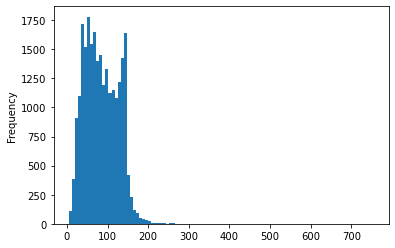

In [7]:
X=df['full_text'].apply(len)
X.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

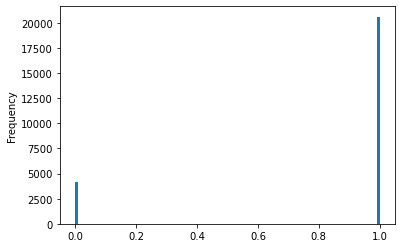

In [8]:
df['label'].plot.hist(bins=100)

In [9]:
def text_preprocessing(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [10]:
df['full_text'].head().apply(text_preprocessing)

0    [RT, mayasolovely, woman, shouldnt, complain, ...
1    [RT, mleew17, boy, dats, coldtyga, dwn, bad, c...
2    [RT, UrKindOfBrand, Dawg, RT, 80sbaby4life, ev...
3      [RT, CGAnderson, vivabased, look, like, tranny]
4    [RT, ShenikaRoberts, shit, hear, might, true, ...
Name: full_text, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer 

In [12]:
count_vect=CountVectorizer(analyzer=text_preprocessing).fit(df['full_text'])
count_vect

CountVectorizer(analyzer=<function text_preprocessing at 0x0000015E9BFF2400>)

In [13]:
tweet_bow=count_vect.transform(df['full_text'])
tweet_bow

<24783x45750 sparse matrix of type '<class 'numpy.int64'>'
	with 219896 stored elements in Compressed Sparse Row format>

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

In [15]:
tfidf_transformer=TfidfTransformer().fit(tweet_bow)
tfidf_transformer

TfidfTransformer()

In [16]:
tweet_tfidf=tfidf_transformer.transform(tweet_bow)
tweet_tfidf

<24783x45750 sparse matrix of type '<class 'numpy.float64'>'
	with 219896 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(tweet_tfidf,df['label'],test_size=0.1)

In [18]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [28]:
prediction=mnb.predict(x_test)
prediction[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [20]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,prediction)
acc

0.8430818878580073

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.12      0.21       409
           1       0.85      1.00      0.92      2070

    accuracy                           0.85      2479
   macro avg       0.91      0.56      0.56      2479
weighted avg       0.87      0.85      0.80      2479



In [21]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
y_bar=['accuracy_score', 'f1_score', 'recall_score', 'precision_score']
x_bar=[accuracy_score(y_test, prediction),f1_score(y_test, prediction) ,recall_score(y_test, prediction) , precision_score(y_test, prediction)]
y_bar

['accuracy_score', 'f1_score', 'recall_score', 'precision_score']

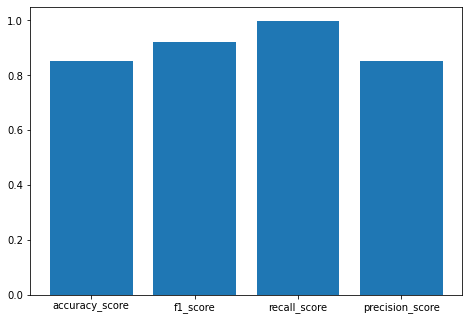

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(y_bar,x_bar)
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression()

In [24]:
prediction2=lm.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
acc2=accuracy_score(y_test,prediction2)
acc2

0.9241629689390883

In [26]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
y_bar2=['accuracy_score', 'f1_score', 'recall_score', 'precision_score']
x_bar2=[accuracy_score(y_test, prediction2),f1_score(y_test, prediction2) ,recall_score(y_test, prediction2) , precision_score(y_test, prediction2)]
y_bar2

['accuracy_score', 'f1_score', 'recall_score', 'precision_score']

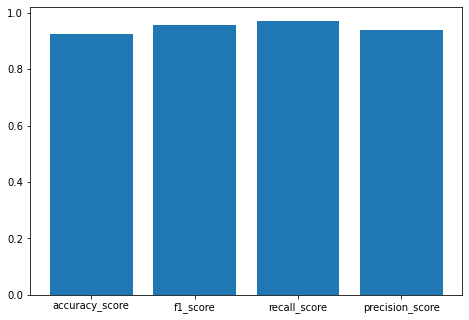

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(y_bar2,x_bar2)
plt.show()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75       409
           1       0.94      0.97      0.96      2070

    accuracy                           0.92      2479
   macro avg       0.88      0.83      0.85      2479
weighted avg       0.92      0.92      0.92      2479



In [29]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train,y_train)

SVC()

In [30]:
prediction3=clf.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score
acc3=accuracy_score(y_test,prediction3)
acc3

0.9358612343686971

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       409
           1       0.96      0.97      0.96      2070

    accuracy                           0.94      2479
   macro avg       0.89      0.87      0.88      2479
weighted avg       0.93      0.94      0.93      2479



In [33]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
y_bar3=['accuracy_score', 'f1_score', 'recall_score', 'precision_score']
x_bar3=[accuracy_score(y_test, prediction3),f1_score(y_test, prediction3) ,recall_score(y_test, prediction3) , precision_score(y_test, prediction3)]
y_bar3

['accuracy_score', 'f1_score', 'recall_score', 'precision_score']

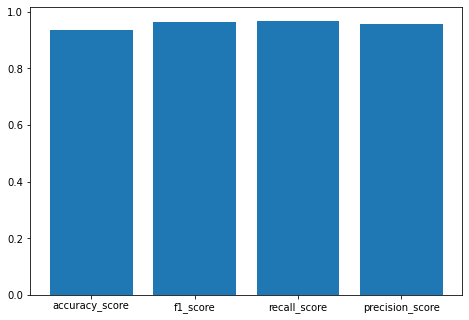

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(y_bar3,x_bar3)
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
prediction4=neigh.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
acc4=accuracy_score(y_test,prediction4)
acc4

0.8753529649052038

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction4))

              precision    recall  f1-score   support

           0       0.72      0.40      0.52       409
           1       0.89      0.97      0.93      2070

    accuracy                           0.88      2479
   macro avg       0.80      0.69      0.72      2479
weighted avg       0.86      0.88      0.86      2479



In [39]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
y_bar4=['accuracy_score', 'f1_score', 'recall_score', 'precision_score']
x_bar4=[accuracy_score(y_test, prediction4),f1_score(y_test, prediction4) ,recall_score(y_test, prediction4) , precision_score(y_test, prediction4)]
y_bar4

['accuracy_score', 'f1_score', 'recall_score', 'precision_score']

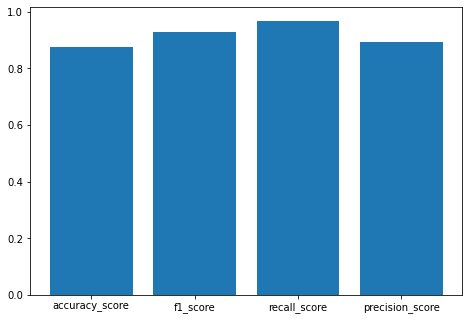

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(y_bar4,x_bar4)
plt.show()

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [42]:
prediction5=dtree.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
acc5=accuracy_score(y_test,prediction5)
acc5

0.9286002420330779

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction5))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       409
           1       0.97      0.94      0.96      2070

    accuracy                           0.93      2479
   macro avg       0.86      0.90      0.88      2479
weighted avg       0.93      0.93      0.93      2479



In [45]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
y_bar5=['accuracy_score', 'f1_score', 'recall_score', 'precision_score']
x_bar5=[accuracy_score(y_test, prediction5),f1_score(y_test, prediction5) ,recall_score(y_test, prediction5) , precision_score(y_test, prediction5)]
y_bar5

['accuracy_score', 'f1_score', 'recall_score', 'precision_score']

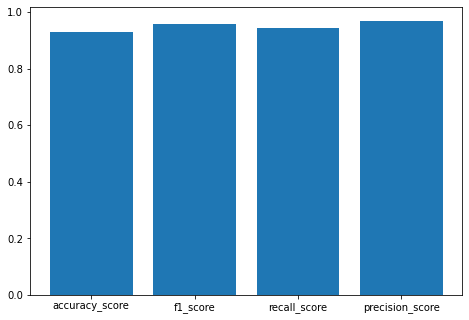

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(y_bar5,x_bar5)
plt.show()

In [47]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=100, random_state=0)
adb.fit(x_test,y_test)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [48]:
prediction6=adb.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score
acc6=accuracy_score(y_test,prediction6)
acc6

0.9604679306171844

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction6))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       409
           1       1.00      0.96      0.98      2070

    accuracy                           0.96      2479
   macro avg       0.91      0.97      0.93      2479
weighted avg       0.97      0.96      0.96      2479



In [51]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
y_bar6=['accuracy_score', 'f1_score', 'Decision Tree', 'precision_score']
x_bar6=[accuracy_score(y_test, prediction6),f1_score(y_test, prediction6) ,recall_score(y_test, prediction6) , precision_score(y_test, prediction6)]
y_bar6

['accuracy_score', 'f1_score', 'Decision Tree', 'precision_score']

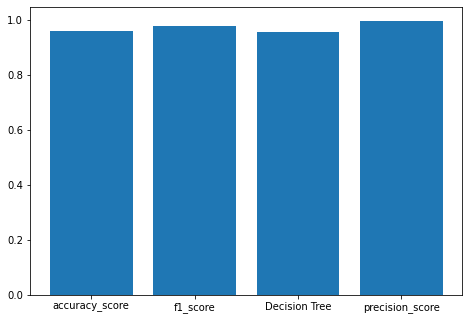

In [52]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(y_bar6,x_bar6)
plt.show()

In [70]:
y_mod=['MNB','Logistic Regression','SVM', 'KNN','Decsion Tree' ,'Ada Boost','LSTM']
x_acc=[acc,acc2,acc3,acc4,acc5,acc6,0.94]
x_acc

[0.8535699878983461,
 0.9241629689390883,
 0.9358612343686971,
 0.8753529649052038,
 0.9286002420330779,
 0.9604679306171844,
 0.94]

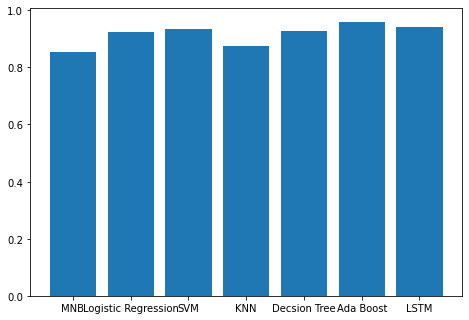

In [71]:
fig = plt.figure()
ax = fig.add_axes([5,0,1,1])
ax.bar(y_mod,x_acc)
plt.show()